<a href="https://colab.research.google.com/github/Shamsh-ms/data_science/blob/main/Dry_Bean_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [203]:
dataset=pd.read_csv("/content/drive/My Drive/datasets/Dry_Bean_Dataset.csv")
dataset.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [204]:
labels=dataset.Class
labels.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [205]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [206]:
columns= input_features.columns
columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [207]:
input_features = dataset.drop(columns=['Class'],axis=1)
print(input_features.head())
print(input_features.shape)

    Area  Perimeter  MajorAxisLength  ...  ShapeFactor2  ShapeFactor3  ShapeFactor4
0  28395    610.291       208.178117  ...      0.003147      0.834222      0.998724
1  28734    638.018       200.524796  ...      0.003564      0.909851      0.998430
2  29380    624.110       212.826130  ...      0.003048      0.825871      0.999066
3  30008    645.884       210.557999  ...      0.003215      0.861794      0.994199
4  30140    620.134       201.847882  ...      0.003665      0.941900      0.999166

[5 rows x 16 columns]
(13611, 16)


In [208]:
y=[]
classes = [i for i,label in enumerate(labels.unique())]
classes
for i in labels:
  if i=='SEKER':
    y.append(classes[0])
  elif i=='BARBUNYA':
    y.append(classes[1])
  elif i=='BOMBAY':
    y.append(classes[2])
  elif i=='CALI':
    y.append(classes[3])
  elif i=='HOROZ':
    y.append(classes[4])
  elif i=='SIRA':
    y.append(classes[5])
  else:
    y.append(classes[6])
y[-5:-1]
y_data = np.array([y])

In [183]:
print(X.shape)
print(y_data.reshape(13611,1).shape)
y_data.shape

(13611, 16)
(13611, 1)


(1, 13611)

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_data.reshape(13611,1), test_size=0.33, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(9119, 16) (9119, 1)
(4492, 16) (4492, 1)


In [216]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [217]:
X_train.shape[1]
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6, mode='max')

In [218]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
                             tf.keras.layers.Dense(20,tf.nn.relu),
                             tf.keras.layers.Dense(12,tf.nn.relu),
                             tf.keras.layers.Dense(7,tf.nn.softmax)
])

In [219]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=loss_fn,
    metrics=['accuracy']
)
model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_40 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_122 (Dense)            (None, 20)                340       
_________________________________________________________________
dense_123 (Dense)            (None, 12)                252       
_________________________________________________________________
dense_124 (Dense)            (None, 7)                 91        
Total params: 683
Trainable params: 683
Non-trainable params: 0
_________________________________________________________________


In [220]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
285/285 [==============================] - 1s 1ms/step - loss: 1.6253 - accuracy: 0.6122
Epoch 2/100
285/285 [==============================] - 0s 1ms/step - loss: 1.3609 - accuracy: 0.8532
Epoch 3/100
285/285 [==============================] - 0s 1ms/step - loss: 1.2777 - accuracy: 0.9128
Epoch 4/100
285/285 [==============================] - 0s 1ms/step - loss: 1.2622 - accuracy: 0.9175
Epoch 5/100
285/285 [==============================] - 0s 1ms/step - loss: 1.2553 - accuracy: 0.9196
Epoch 6/100
285/285 [==============================] - 0s 1ms/step - loss: 1.2511 - accuracy: 0.9233
Epoch 7/100
285/285 [==============================] - 0s 1ms/step - loss: 1.2489 - accuracy: 0.9229
Epoch 8/100
285/285 [==============================] - 0s 1ms/step - loss: 1.2475 - accuracy: 0.9219
Epoch 9/100
285/285 [==============================] - 0s 1ms/step - loss: 1.2455 - accuracy: 0.9258
Epoch 10/100
285/285 [==============================] - 0s 1ms/step - loss: 1.2447 - accura

In [221]:
score = model.evaluate(X_test, y_test)
print("Test Accuracy is: ",score[1])

141/141 [==============================] - 0s 1ms/step - loss: 1.2372 - accuracy: 0.9294
Test Accuracy is:  0.9294301271438599


In [226]:
X_test[0].shape
print(X_test[0].shape())

[-0.36336434 -0.5297599  -0.696728    0.11519855 -1.3312976  -1.5965698
 -0.37067923 -0.3507234   0.44163448  1.0594105   1.6016086   1.4988444
 -0.3741109   1.1517485   1.5426658   0.9807544 ]


In [228]:
pred = model.predict(X_test)
pred.shape

(4492, 7)

In [233]:
pred[4491]

array([1.2438816e-34, 8.4241023e-28, 8.8638736e-30, 7.0059030e-14,
       1.0000000e+00, 5.1024290e-19, 8.2529839e-26], dtype=float32)

In [234]:
np.argmax(pred[4491])

4

In [235]:
y_test[4491]

array([4])

In [237]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

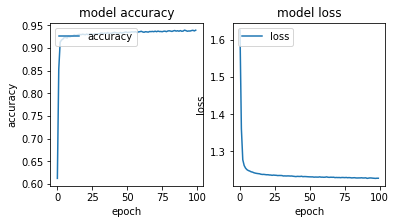

In [242]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')